In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Part 6 ~ Max Kaleiber data
Linear regression & GD

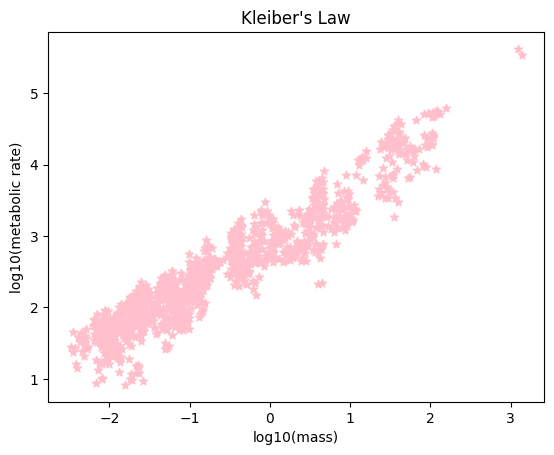

In [8]:
with open('data\\kleibers_law_data.csv', 'r') as f:
    data = f.read()
data = data.split('\n')
data = [i.split(',') for i in data]
mass = [float(i[0]) for i in data[1::]]
mrate = [float(i[1]) for i in data[1::]]

mass = np.array(mass)
mrate = np.array(mrate)

mass_log = np.log10(mass)
mrate_log = np.log10(mrate)

plt.scatter(mass_log, mrate_log, c='pink', marker='*')
plt.xlabel('log10(mass)')
plt.ylabel('log10(metabolic rate)')
plt.title('Kleiber\'s Law')
plt.show()



Iteration 0: Cost 4.760218464527079
Iteration 100: Cost 0.7324088570571382
Iteration 200: Cost 0.2508776070940299
Iteration 300: Cost 0.0967806565556421
Iteration 400: Cost 0.05608299459117064
Iteration 500: Cost 0.03890049323498856
Iteration 600: Cost 0.03283757493414056
Iteration 700: Cost 0.03119770122156205
Iteration 800: Cost 0.030550345218042483
Iteration 900: Cost 0.030289835598826857


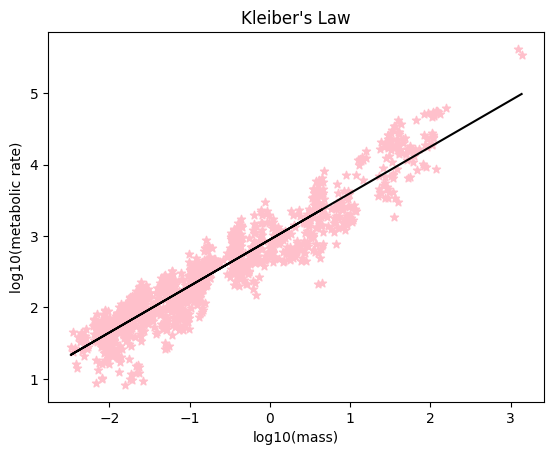

In [7]:
h = lambda theta, X: np.dot(X, theta)
cost_computation = lambda theta, X, y: (1 / (2 * y.size)) * np.sum((h(theta, X) - y) ** 2)


def mini_batch_gd(theta, X, y, alpha, num_iters, batch_size):
    m = y.shape[0]  # number of training examples
    cost_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        idx = np.random.randint(0, m, batch_size)
        X_batch = X[idx]
        y_batch = y[idx]
        
        predictions = h(theta, X_batch)
        errors = predictions - y_batch
        gradient = (1 / batch_size) * np.dot(X_batch.T, errors)
        theta -= alpha * gradient
        cost_history[i] = cost_computation(theta, X, y)
        
        if i % 100 == 0:  # print the cost every 100 iterations
            print(f"Iteration {i}: Cost {cost_history[i]}")
    
    return theta, cost_history


alpha = 0.01
iterations = 1000
batch_size = 10
theta = np.random.randn(2)
X = np.column_stack((np.ones(mass_log.size), mass_log))
y = mrate_log

theta, cost_history = mini_batch_gd(theta, X, y, alpha, iterations, batch_size)

plt.scatter(mass_log, mrate_log, c='pink', marker='*')
plt.xlabel('log10(mass)')
plt.ylabel('log10(metabolic rate)')
plt.title('Kleiber\'s Law')
plt.plot(mass_log, h(theta, X), c='black')
plt.show()



In [9]:
def predict_metabolic_rate(mass, theta):
    return 10**(theta[0] + theta[1] * np.log10(mass))


kal = 1
joul = 4.184*kal
kjoul = joul * 1000

def predict_animal_mass_in_kloul_rate(rate, theta):
    return 10**((np.log10(rate*kjoul) - theta[0]) / theta[1])


print(f'metabolic rate of 250kg animal: {predict_metabolic_rate(250, theta):.2f} Kcal/day')
print(f'mass of animal with 3.5kjoul metabolic rate: {predict_animal_mass_in_kloul_rate(3.5, theta):.2f} kg')



metabolic rate of 250kg animal: 32246.31 Kcal/day
mass of animal with 3.5kjoul metabolic rate: 74.27 kg
